# Stability test

## Interferometer chamber

### Under vacuum


Results on the measurements on 07/10/2019:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import pandas as pd
from tqdm import tqdm
import scipy.constants as cns
from scipy import stats

In [22]:
lbd = 530e-9
rad2atto = 2*lbd / (2*np.pi*cns.c) * 1e18

In [3]:
plt.rcParams["figure.figsize"] = (20,10)

In [4]:
path = 'O:\\19_LaserData\\14_LTA1\\Automatic_recordings\\data\\frames'
fname = os.listdir(path)

In [5]:
fname = [fn for fn in fname if 'phases_20191018_' in fn]


In [6]:
fname

['phases_20191018_100001.h5',
 'phases_20191018_103527.h5',
 'phases_20191018_105211.h5',
 'phases_20191018_113300.h5',
 'phases_20191018_115706.h5',
 'phases_20191018_121929.h5',
 'phases_20191018_144602.h5',
 'phases_20191018_155251.h5',
 'phases_20191018_165241.h5',
 'phases_20191018_170358.h5']

In [7]:
def read_h5file(name):
    with h5py.File(name, 'r') as f:
        ph = np.array(f['phase'])
        ti = np.array(f['time'])
        com = f['comment'][()]
        print(name)
        print(f['comment'][()])
        #raw = np.array(f['signal'])
    return (ti, ph, com)

def normalize_time(t):
    t = t - t.min()
    tmp = np.linspace(0, np.round(t.max()), len(t))
    return(tmp)

def wraptopi(x):
        pi = np.pi
        x = x - np.floor(x/(2*pi)) *2 *pi
        x[x >= pi] = x[x >= pi] - 2*pi
        return x

In [8]:
fname = ['phases_20191018_103527.h5', 'phases_20191018_105211.h5', 'phases_20191018_113300.h5', 
         'phases_20191018_115706.h5', 'phases_20191018_121929.h5', 'phases_20191018_144602.h5']

In [12]:
exp = []
for i,fn in tqdm(enumerate(fname)):
    fullname = os.path.join(path, fn)
    ti, ph, comment = read_h5file(fullname)
    ph = np.unwrap(ph, discont=10*np.pi)
    df = pd.DataFrame({'time':ti, 'phase':ph, 'comment':comment}, index=normalize_time(ti))
    df.phase = df.phase - df.phase.rolling(50).mean()
    exp.append(df)


0it [00:00, ?it/s]

O:\19_LaserData\14_LTA1\Automatic_recordings\data\frames\phases_20191018_103527.h5
10 min long measurement
Total weight: 65kg
Weight on the top of the frame: 27kg
Weight on the bottom of the frame: 38kg
On breadboard: 15kg fix down with screws diagnally
On air + seizmograph (20191018_1030_air_27kg_frame_15kg_brd)


1it [00:00,  1.44it/s]

O:\19_LaserData\14_LTA1\Automatic_recordings\data\frames\phases_20191018_105211.h5
10 min long measurement
Total weight: 65kg
Weight on the top of the frame: 27kg
Weight on the bottom of the frame: 38kg
On breadboard: 15kg fix down with screws diagnally
On air + seizmograph (20191018_1030_air_27kg_frame)


2it [00:00,  1.82it/s]

O:\19_LaserData\14_LTA1\Automatic_recordings\data\frames\phases_20191018_113300.h5
10 min long measurement
Total weight: 65kg
Weight on the top of the frame: 27kg
Weight on the bottom of the frame: 38kg
On air + seizmograph (20191018_1030_air_27kg_frame_no_rubber)
no rubber


3it [00:01,  2.26it/s]

O:\19_LaserData\14_LTA1\Automatic_recordings\data\frames\phases_20191018_115706.h5
10 min long measurement
Total weight: 65kg
Weight on the top of the frame: 27kg
Weight on the bottom of the frame: 38kg
On air + seizmograph (20191018_1030_air_27kg_frame_no_rubber_15brb), 10min, sampling rate 16384Hz
no rubber


4it [00:01,  2.65it/s]

O:\19_LaserData\14_LTA1\Automatic_recordings\data\frames\phases_20191018_121929.h5
10 min long measurement
Total weight: 65kg
Weight on the top of the frame: 27kg
Weight on the bottom of the frame: 38kg
On air + seizmograph (20191018_1030_air_27kg_frame_no_rubber_15brb_small), 10min, sampling rate 16384Hz
no rubber


5it [00:01,  2.88it/s]

O:\19_LaserData\14_LTA1\Automatic_recordings\data\frames\phases_20191018_144602.h5
10 min long measurement
Total weight: 65kg
Weight on the top of the frame: 27kg
Weight on the bottom of the frame: 38kg
On air + seizmograph (20191018_1030_air_27kg_frame_no_rubber_15brb_small2), 10min, sampling rate 16384Hz
no rubber
relocated the  setup to the other side of the breadboard


6it [00:01,  3.04it/s]


In [14]:
exp[1].head(50)

,time,phase,comment
0.000000,0.098079,NaN,10 min long measurement\nTotal weight: 65kg\nW...
0.003865,0.108089,NaN,10 min long measurement\nTotal weight: 65kg\nW...
0.007730,0.130103,NaN,10 min long measurement\nTotal weight: 65kg\nW...
0.011595,0.143606,NaN,10 min long measurement\nTotal weight: 65kg\nW...
0.015460,0.149140,NaN,10 min long measurement\nTotal weight: 65kg\nW...
0.019325,0.150645,NaN,10 min long measurement\nTotal weight: 65kg\nW...
0.023190,0.158132,NaN,10 min long measurement\nTotal weight: 65kg\nW...
0.027055,0.158132,NaN,10 min long measurement\nTotal weight: 65kg\nW...
0.030920,0.160130,NaN,10 min long measurement\nTotal weight: 65kg\nW...
0.034785,0.162096,NaN,10 min long measurement\nTotal weight: 65kg\nW...


In [24]:
1e-9/3e8 * 1e18

3.3333333333333335

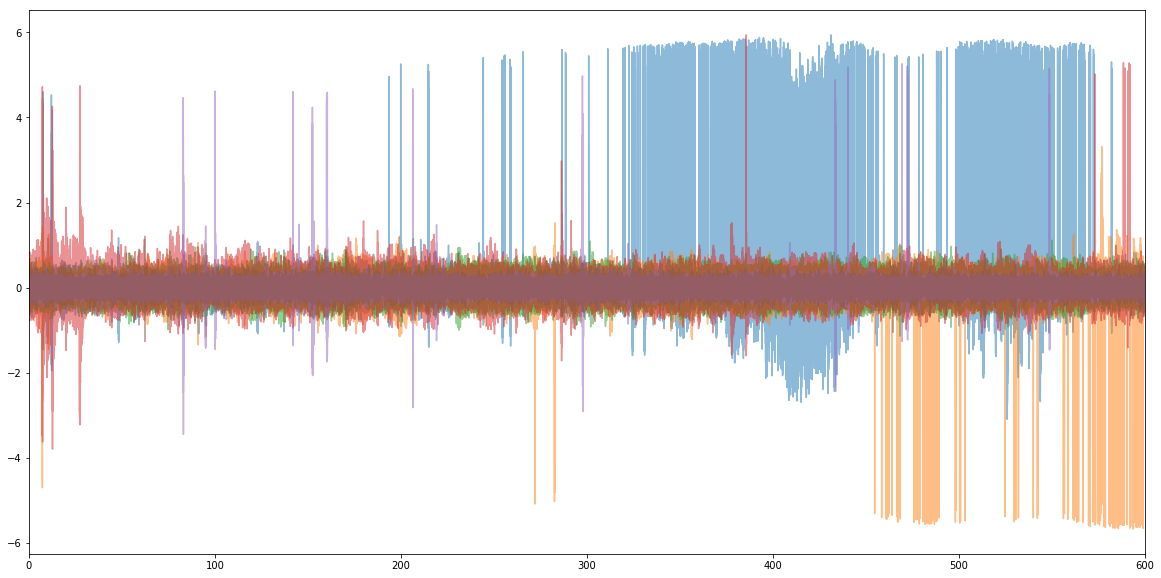

In [15]:
for i in exp:
    i['phase'].plot(alpha=0.5)

In [9]:
exp_mod=[]
for m in exp:
    tmp = m.copy()
    tmp=tmp.drop(columns=['time'])
    tmp.phase = tmp.phase - tmp.phase.mean()
    par = np.polyfit(tmp.index.values, tmp.phase, 2)
    ff = np.poly1d(par)
    tmp.phase = tmp.phase - ff(tmp.index)
    tmp['20p_std'] = tmp.phase.rolling(20, center=True).std()
    tmp['std'] = tmp.phase.std()
    exp_mod.append(tmp)

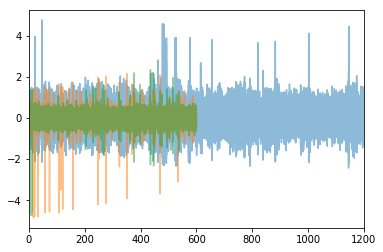

In [15]:
for i in exp_mod:
    i['phase'].plot(alpha=0.5)

Lets print out the standard deviation of the different measurements.

In [23]:
std=[]
for i in exp:
    print(i.phase.std()*rad2atto)
    std.append(i.phase.std())

475.8696974553096
191.1883359932965
131.5467423523274
169.86506640666207
96.98188467018579
82.45962814591772


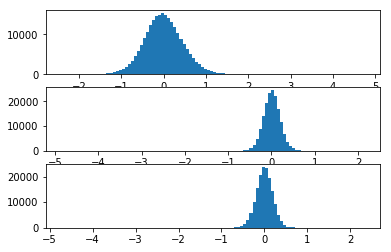

In [17]:
fig, _ = plt.subplots(nrows=3, ncols=1)
for j, i in enumerate(exp_mod):
    plt.subplot(3, 1, j+1)
    plt.hist(i[['phase']].values,bins=100)

It is easy to see that any data that is basically outside the -2..2 radian range is an artificial noise that is caused by a door or somebody dancing in the lab. To get a better estimate on the standard deviation we will not focus on the tail events. 

In [18]:
exp_filtered=[]
for m in exp_mod:
    tmp = m.copy()
    density = stats.gaussian_kde(m.phase)
    xx = np.linspace(m.phase.min(), m.phase.max(),300)
    dxx = xx[1] - xx[0]
    pdf = density.evaluate(xx)
    xx_mean = np.sum(xx * pdf) * dxx
    std = np.sqrt(np.sum(((xx-xx_mean)**2)*pdf)*dxx)
    tmp.phase = tmp.phase - xx_mean
    tmp = tmp[(tmp['phase'] > -2*std)]
    tmp = tmp[(tmp['phase'] < 2*std)]
    tmp['20p_std'] = tmp.phase.rolling(20, center=True).std()
    tmp['std'] = tmp.phase.std()
    exp_filtered.append(tmp)

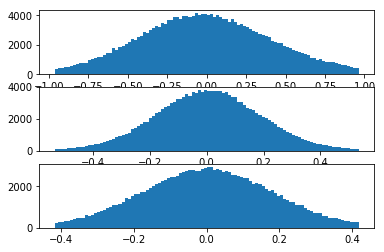

In [20]:
fig, _ = plt.subplots(nrows=3, ncols=1)
for j, i in enumerate(exp_filtered):
    plt.subplot(3, 1, j+1)
    plt.hist(i[['phase']].values,bins=100)

In [22]:
std=[]
for i in exp_filtered:
    print(i.loc[0,'std'])
    std.append(i.loc[0,'std'])
std=np.array(std)

0.4008042537582174
0.1864904233050025
0.17100118507636078


The average distance from the mean is $\pm$ {{std}} radians. Therefore it corresponds to a phase shift of $\Delta\phi$= {{2*std}} rad. Assuming a diode laser wavelength $\lambda$=530 nm, the phase shift corresponds to:

In [23]:
lbd = 530e-9
dphi=2*std
dx = dphi*lbd / (2*np.pi)
print(dx*1e9, 'nm')

[67.61737689 31.46172507 28.84862491] nm


This distance is done twice by the light on the interferometer so the temporal stability of the given interferometer is:

In [24]:
dt = 2*dx/cns.c
print(dt*1e18, 'as')

[451.09458284 209.89003713 192.45730933] as


### Spectral analysis

In [16]:
exp_fft=[]
for m in exp_mod:
    N = len(m.phase)
    t = m.index.values
    T = t.max() - t.min()
    dw = 2*np.pi / T
    dNu = 1 / (t[1]-t[0])
    print(dNu)
    freq = np.fft.fftshift(np.fft.fftfreq(N) * N * dw) / 2 / np.pi
    yft = np.fft.fftshift(np.fft.fft(m.phase))
    yft_hamming = np.fft.fftshift(np.fft.fft(m.phase * np.hamming(N)))
    tmp = pd.DataFrame({'fft':np.abs(yft), 'fft_hmg':yft_hamming, 'spectrum':np.abs(yft_hamming)}, index=freq)
    tmp['sp_smooth'] = tmp[['spectrum']].rolling(20, win_type='hamming', center=True).mean()
    exp_fft.append(tmp)

191.74166666666667
277.92333333333335
261.92833333333334


In [17]:
exp_fft[0].head()

,fft,fft_hmg,spectrum,sp_smooth
-95.870833,304.252116,(-93.17343401637977-220.0107402796274j),238.926798,NaN
-95.870000,209.843985,(96.5391741561877+102.44146104842457j),140.762442,NaN
-95.869167,186.813785,(27.497205620336665-65.357444591813j),70.906219,NaN
-95.868333,282.349877,(11.58509544364469+117.2810526355255j),117.851855,NaN
-95.867500,83.501539,(-12.647844620155357+44.58183463652954j),46.341212,NaN


(-10, 50)

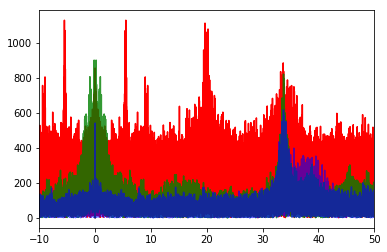

In [18]:
colors=['r', 'g', 'b', 'c']
alpha = 1
for j, i in enumerate(exp_fft):
    i['fft'].plot(color=colors[j], alpha=alpha )
    alpha=alpha-0.2
plt.xlim([-10, 50])
#plt.ylim([0,1])